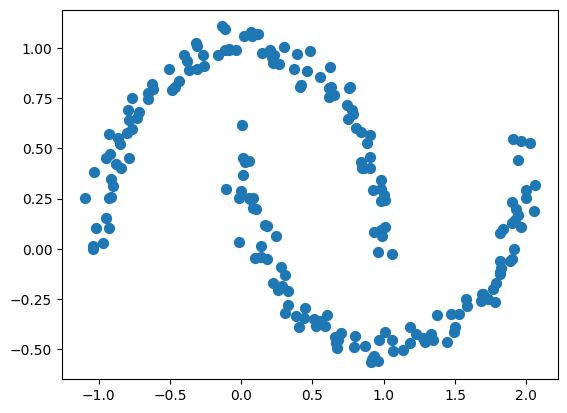

<ipython-input-1-ab19ea55ac15>:28: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(cluster[:, 0], cluster[:, 1], c=col, edgecolors='k')


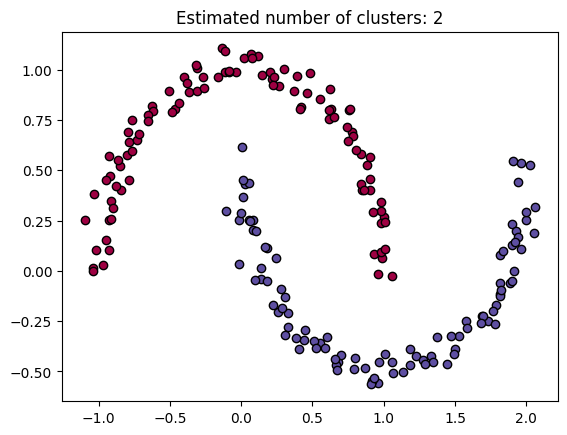

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Visualize the data
plt.scatter(X[:,0], X[:,1], s=50)
plt.show()

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(X)

# Visualize the clustering result
labels = dbscan.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
for label, color in zip(set(labels), colors):
    if label == -1:
        col = 'k'
    else:
        col = color
    cluster = X[labels == label]
    plt.scatter(cluster[:, 0], cluster[:, 1], c=col, edgecolors='k')
plt.title('Estimated number of clusters: %d' % n_clusters)
plt.show()

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


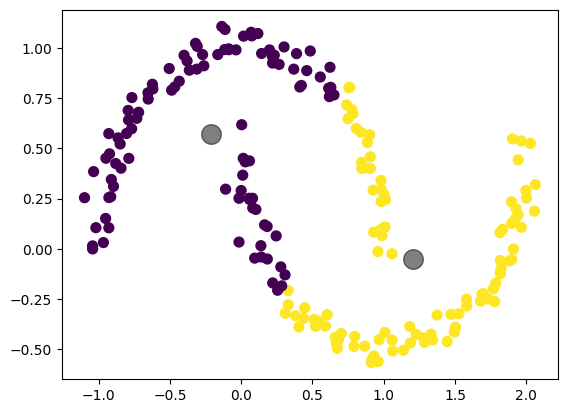

In [2]:
from sklearn.cluster import KMeans

# Build the KMeans model
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Visualize the clustering results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.show()